# Artificial Neural Network Forward Propagation


In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
# loading train data and test data
(train_images_ori, train_labels), (test_images_ori, test_labels) = mnist.load_data()

In [3]:
print('Test image shape:', test_images_ori.shape)
print('len of test label:', len(test_labels))

Test image shape: (10000, 28, 28)
len of test label: 10000


In [4]:
train_images = train_images_ori.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images_ori.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [5]:
# model

model = keras.Sequential([
            layers.Dense(512, activation = 'relu'),
            layers.Dense(10, activation = 'softmax')
            ])


In [6]:
model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 11ms/step - loss: 0.2572 - accuracy: 0.9251
Epoch 2/5
469/469 [==============================] - 5s 10ms/step - loss: 0.1044 - accuracy: 0.9687
Epoch 3/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0703 - accuracy: 0.9789
Epoch 4/5
469/469 [==============================] - 5s 12ms/step - loss: 0.0516 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 5s 11ms/step - loss: 0.0380 - accuracy: 0.9883


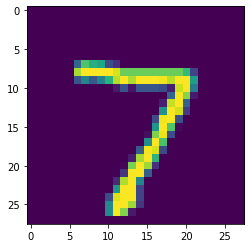

In [8]:
plt.imshow(test_images_ori[0])
plt.show()

In [9]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)

In [10]:
predictions[0]

array([1.6696768e-09, 4.4030456e-11, 1.2387975e-06, 3.0361165e-05,
       3.3077306e-12, 7.0096258e-09, 2.9384301e-15, 9.9996793e-01,
       9.6658091e-08, 3.9012397e-07], dtype=float32)

In [11]:
predictions[0][7]

0.99996793

In [12]:
predictions[0].argmax()

7

In [13]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.0641 - accuracy: 0.9796
test_acc: 0.9796000123023987


## Black Block Model

### Forward and backward propagation

In [14]:
import numpy as np
np.random.seed(1)

In [15]:
def relu(x):
    return (x > 0) * x  # return x if x > 0 otherwise return 0

def relu2derive(output):
    return output > 0   # return 1 for input > 0 otherwise return 0



In [16]:
input1 = np.array([[1, 1], [1, 1]])
output1 = np.array([[1, 1]]).T
alpha = 1
hidden_size = 3
print(input1.shape)

(2, 2)


In [17]:
weights_0_1 = np.array([[0, 0.3], [0.1, 0.4]])
print(weights_0_1.shape)

(2, 2)


In [18]:
weights_1_2 = np.array([[0.1, -0.3], [0.2, 0.2]])
print(weights_1_2.shape)

(2, 2)


In [19]:
weights_2_3 = np.array([[0.4], [0.3]])
print(weights_2_3.shape)

(2, 1)


In [20]:
for iteration in range(1):
    output_error = 0
    for i in range(len(input1)):
        
        layer_0 = input1[i:i+1]
        print('layer 0', layer_0,'shape', layer_0.shape)
        
        layer_1 = relu(np.dot(layer_0, weights_0_1))
        layer_2 = relu(np.dot(layer_1, weights_1_2))
        output = np.dot(layer_2, weights_2_3)
        
        print('layer 1', layer_1)
        print('layer 2', layer_2)
        print('output', output)
        
        output_error += np.sum((output - output1[i:i+1])**2)
        output_delta = (output - output1[i:i+1])
        print('delta output:', output_delta)
        
        layer_2_delta = output_delta.dot(weights_2_3.T)*relu2derive(layer_2)
        layer_1_delta = layer_2_delta.dot(weights_1_2.T)*relu2derive(layer_1)
        
        print('layer 2 delta', layer_2_delta)
        print('layer 1 delta', layer_1_delta)
        
        weights_2_3 -= alpha * layer_2.T.dot(output_delta)
        weights_1_2 -= alpha * layer_1.T.dot(layer_2_delta)
        weights_0_1 -= alpha * layer_0.T.dot(layer_1_delta)
        
        print('weight 2_3', weights_2_3)
        print('weight 1_2', weights_1_2)
        print('weight 0_1', weights_0_1)

layer 0 [[1 1]] shape (1, 2)
layer 1 [[0.1 0.7]]
layer 2 [[0.15 0.11]]
output [[0.093]]
delta output: [[-0.907]]
layer 2 delta [[-0.3628 -0.2721]]
layer 1 delta [[ 0.04535 -0.12698]]
weight 2_3 [[0.53605]
 [0.39977]]
weight 1_2 [[ 0.13628 -0.27279]
 [ 0.45396  0.39047]]
weight 0_1 [[-0.04535  0.42698]
 [ 0.05465  0.52698]]
layer 0 [[1 1]] shape (1, 2)
layer 1 [[0.0093  0.95396]]
layer 2 [[0.43432709 0.36995581]]
output [[0.38071827]]
delta output: [[-0.61928173]]
layer 2 delta [[-0.33196597 -0.24757026]]
layer 1 delta [[ 0.02229437 -0.24736803]]
weight 2_3 [[0.80502083]
 [0.62887688]]
weight 1_2 [[ 0.13936728 -0.2704876 ]
 [ 0.77064226  0.62664212]]
weight 0_1 [[-0.06764437  0.67434803]
 [ 0.03235563  0.77434803]]
